## Imports

In [1]:
import scipy.io, random
import numpy as np
from utils import *
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Forecasting

In [2]:
def plot_forecast(source, prediction, nrow=5, ncol=5, from_=2800, to_=None):
    n = source.shape[0]
    idx = random.sample(range(n), nrow * ncol)
    fig, axs = plt.subplots(nrow, ncol, figsize=(15,8), sharex=True)
    if to_ is None:
        to_ = source.shape[1]
    i = 0
    for r in range(nrow):
        for c in range(ncol):
            axs[r,c].plot(prediction[idx[i], from_:to_], c='r')
            axs[r,c].plot(source[idx[i], from_:to_], c='b')

            i += 1
    fig.tight_layout()
    plt.show()

In [3]:
def plot_shape_function(d, F1, F2, nrow=5, ncol=5):
    n = F1.shape[1]
    idx = random.sample(range(n), nrow * ncol)
    fig, axs = plt.subplots(nrow, ncol, figsize=(15,8), sharex=True)
    i = 0
    for r in range(nrow):
        for c in range(ncol):
            if F2 is not None:
                axs[r,c].scatter(d, F1[:, idx[i]], c='b')
                axs[r,c].scatter(d, F2[:, idx[i]], c='r')
            else:
                axs[r,c].scatter(d, F1[:, idx[i]])
            i += 1
    fig.tight_layout()
    plt.show()

In [ ]:
# Colors
size = out[2].shape[1]
colors = list(mcolors.CSS4_COLORS.keys())
indices = random.choices(range(len(colors)), k=size)

## Learning

In [4]:
_, d, _ = load_pickle('sample_small.pickle')

In [5]:
out = load_pickle('output/sm.pickle')
sim = load_pickle('output/sm_sim.pickle')

In [12]:
out[2] = out[2].detach().numpy()
out[0].shape, out[1].shape, out[2].shape

((30, 5000), (30, 5000), (900, 3999))

In [13]:
sim[2] = sim[2].detach().numpy()
sim[0].shape, sim[1].shape, sim[2].shape

((30, 4000), (30, 5000), (900, 3999))

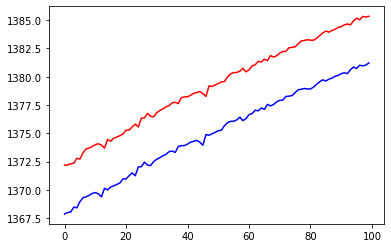

In [17]:
plt.plot(out[0][20, 4900:5000], c='b')
plt.plot(out[1][20, 4900:5000], c='r')
plt.show()

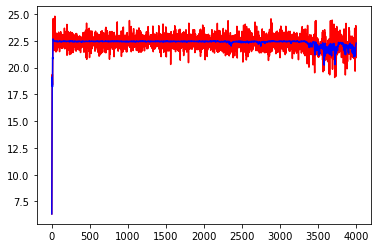

In [24]:
plt.plot(sim[1][20, :4000], c='r')
plt.plot(sim[0][20, :4000], c='b')

plt.show()

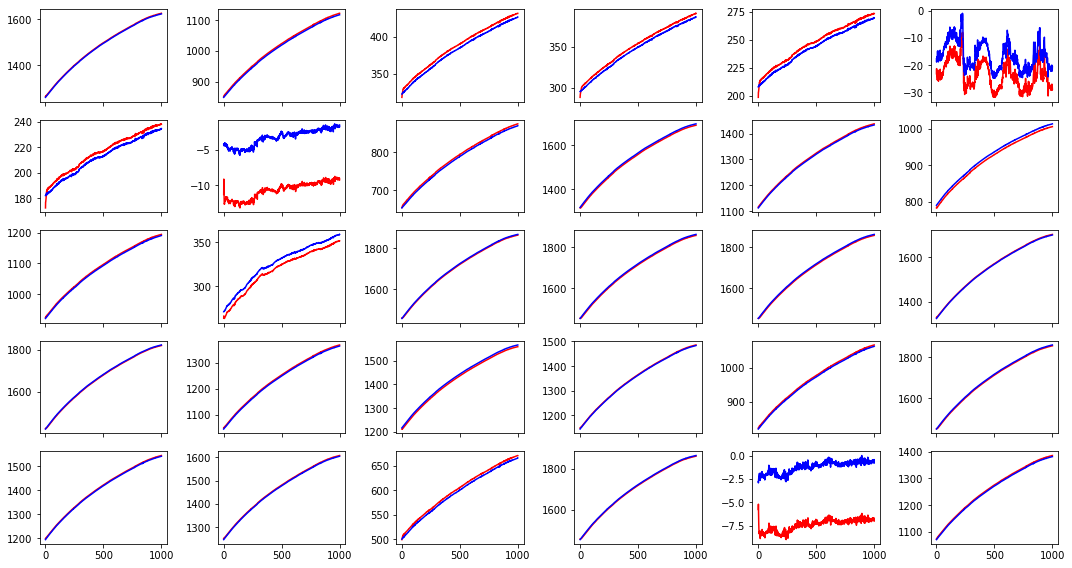

In [9]:
plot_forecast(out[0], out[1], 5, 6, 4000, 5000)

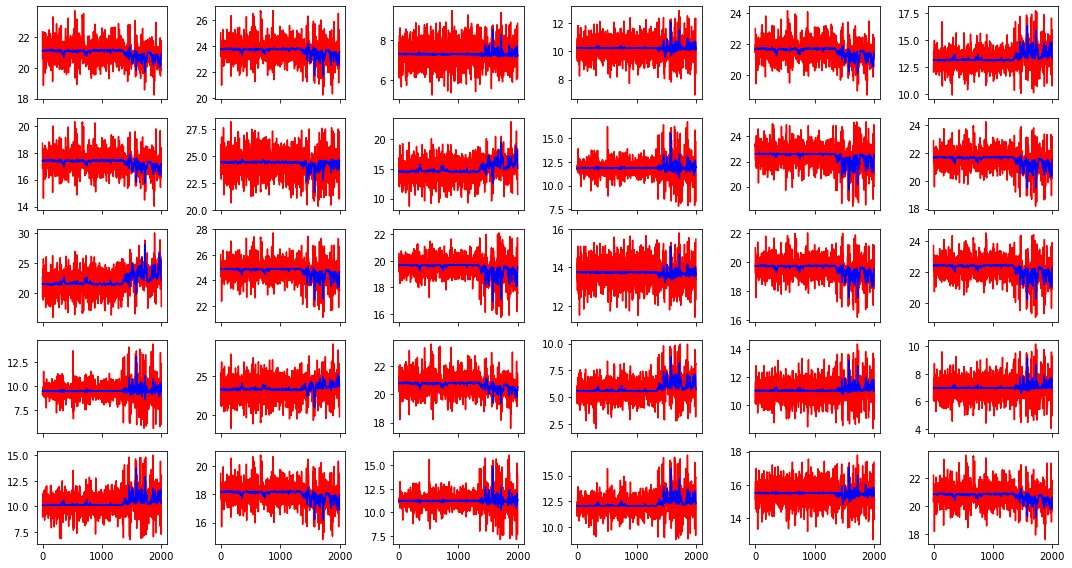

In [10]:
plot_forecast(sim[0], sim[1], 5, 6, 2000, 4000)

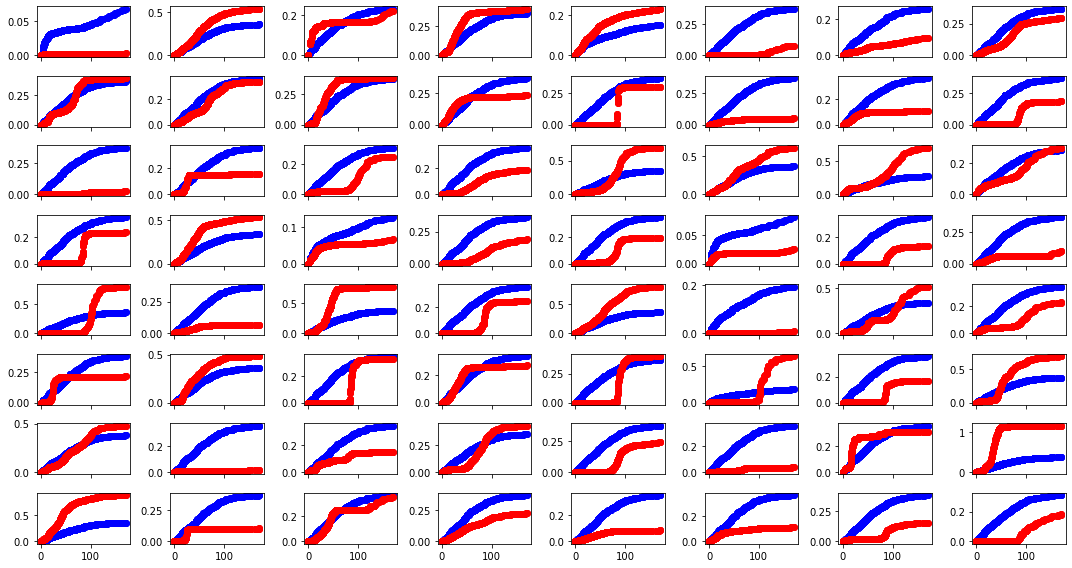

In [16]:
plot_shape_function(d, out[2], sim[2], 8, 8)

## Simulation

In [2]:
data = np.load('data/data_sim.npy')

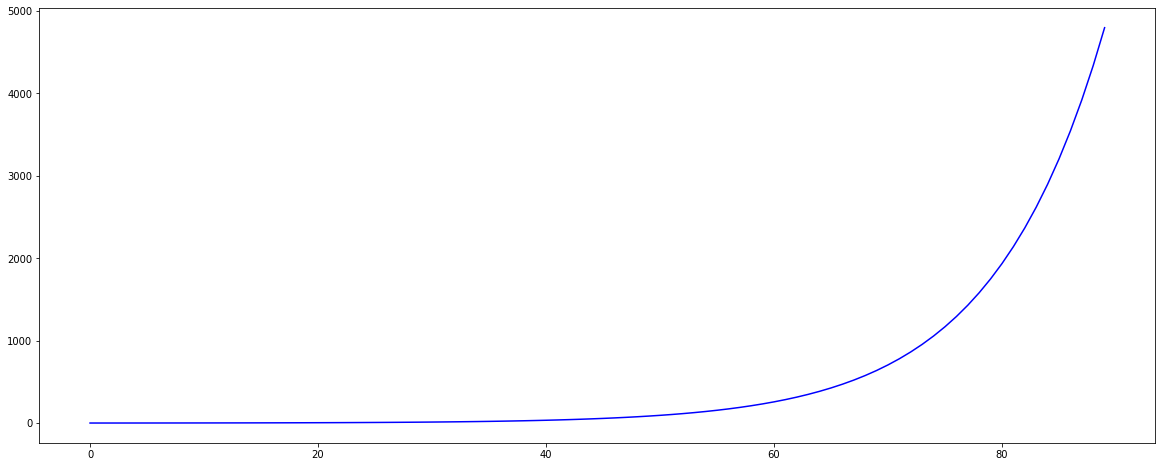

In [5]:
plt.figure(figsize=(20,8))
plt.plot(data[10,10:100], c='b')
plt.show()

## Weight dynamics

In [ ]:
def plot_weights(f, N, name):
    fd = f.reshape((N, N))
    fd = np.exp(-fd)
    plt.figure(figsize=(8, 8))
    plt.imshow(fd, cmap="YlGn")
    plt.title(name)
    cax = plt.axes([0.85, 0.1, 0.075, 0.8])
    plt.colorbar(cax=cax)
    plt.savefig(f'viz/weight/{name}.png')

In [ ]:
F = np.load('data/estimates.npy')
NN, T = F.shape
N = np.sqrt(NN).astype('int')

In [ ]:
for t in range(0, T, 200):
    f = F[:, t]
    plot_weights(f, N, f"T{t}")